<a href="https://colab.research.google.com/github/FanusArefaine/Natural-Language-Processing/blob/main/NLP_Text_Classification_Disaster_or_Not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

from collections import Counter 

### **Importing Training and Testing Dataset**

In [85]:
train_df = pd.read_csv('Datasets/train.csv')
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [86]:
test_df = pd.read_csv('Datasets/test.csv')
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


#### **Feature Exploration**

In [87]:
print("Dimensions of training dataset: ", train_df.shape)
print("Dimensions of testing dataset: ", test_df.shape)

Dimensions of training dataset:  (7613, 5)
Dimensions of testing dataset:  (3263, 4)


In [88]:
# Distribution of target variable in training dataset [BALANCED OR NOT]

# As observed below, the dataset is moderately balanced

disaster_tweets = train_df[train_df['target']==1].shape[0]
not_disaster_tweets = train_df.shape[0] - disaster_tweets

print(f'Percentage of distaster tweets: {round(((disaster_tweets/train_df.shape[0])*100),2)}%')
print(f'Percentage of not distaster tweets: {round(((not_disaster_tweets/train_df.shape[0])*100),2)}%')

Percentage of distaster tweets: 42.97%
Percentage of not distaster tweets: 57.03%


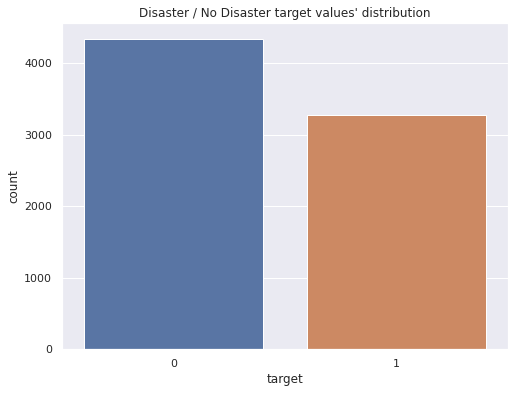

In [89]:
# plotting distribution of the target variable 

plt.figure(figsize=(8,6))
sns.countplot(x='target', data=train_df) 

plt.title("Disaster / No Disaster target values' distribution")
plt.show()

In [90]:
# Checking the training dataset for null values 

# Location has significant amount of missing values and keyword also has some missing values as shown below

train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [91]:
# Checking the testing dataset for null values 

# Same as the training dataset, the testing dataset has a signigincant amount of missing location feature values and also some missing values on the keyword feature 

test_df.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

**Due to missing Values. . .**


     'location' feature can be dropped due to high percentage of missing values. 

     'keyword' feature will be further analyzed for validation and potential for classifiying targets better

  

In [92]:
#Dropping location feature in both training and testing datasets 

train_df.drop(['location'], axis=1, inplace=True)
test_df.drop(['location'], axis=1, inplace=True)

In [93]:
# Disaster tweets' keywords

train_df[train_df['target']==1].groupby('keyword').count()

,id,text,target
keyword,,,
ablaze,13,13,13
accident,24,24,24
airplane%20accident,30,30,30
ambulance,20,20,20
annihilated,11,11,11
...,...,...,...
wounded,26,26,26
wounds,10,10,10
wreck,7,7,7


In [94]:
# exracting disaster and not disaster keywords

not_disaster_keys = train_df[train_df['target']==0]['keyword'].tolist()
disaster_keys = train_df[train_df['target']==1]['keyword'].tolist()

In [95]:
from collections import Counter 

# Keyword frequencies in disaster and not disaster tweets 

not_disaster_keys_counts_sorted = (Counter(not_disaster_keys)).most_common()
disaster_keys_counts_sorted = (Counter(disaster_keys)).most_common()

In [96]:
# Top 20 most common keywords in not disaster tweets 

not_disaster_keys_counts_sorted[:20]

[('body%20bags', 40),
 ('armageddon', 37),
 ('harm', 37),
 ('deluge', 36),
 ('ruin', 36),
 ('wrecked', 36),
 ('explode', 35),
 ('fear', 35),
 ('siren', 35),
 ('twister', 35),
 ('aftershock', 34),
 ('panic', 34),
 ('screaming', 34),
 ('blaze', 33),
 ('blazing', 33),
 ('blizzard', 33),
 ('crush', 33),
 ('sinking', 33),
 ('traumatised', 33),
 ('bloody', 32)]

In [97]:
# Top 20 most common keywords in disaster tweets 

disaster_keys_counts_sorted[:20]

[(nan, 42),
 ('derailment', 39),
 ('outbreak', 39),
 ('wreckage', 39),
 ('debris', 37),
 ('oil%20spill', 37),
 ('typhoon', 37),
 ('evacuated', 32),
 ('rescuers', 32),
 ('suicide%20bomb', 32),
 ('suicide%20bombing', 32),
 ('nuclear%20disaster', 31),
 ('razed', 31),
 ('airplane%20accident', 30),
 ('earthquake', 30),
 ('suicide%20bomber', 30),
 ('bridge%20collapse', 29),
 ('collision', 29),
 ('wildfire', 29),
 ('buildings%20on%20fire', 28)]

In [98]:
# Common keywords in disaster and not disaster tweets 

common_keys = list(set(not_disaster_keys).intersection(set(disaster_keys)))
print(f'Number of common words in disaster and not disaster tweets: {len(common_keys)}\n')
common_keys

Number of common words in disaster and not disaster tweets: 218



[nan,
 'blown%20up',
 'upheaval',
 'curfew',
 'attack',
 'deaths',
 'fatality',
 'epicentre',
 'mass%20murderer',
 'floods',
 'hail',
 'inundation',
 'emergency',
 'fatal',
 'desolation',
 'blood',
 'first%20responders',
 'hijack',
 'traumatised',
 'derail',
 'lava',
 'siren',
 'ruin',
 'screamed',
 'war%20zone',
 'flood',
 'seismic',
 'quarantined',
 'collapse',
 'bomb',
 'collision',
 'damage',
 'electrocute',
 'hijacker',
 'body%20bagging',
 'hostage',
 'screams',
 'bridge%20collapse',
 'panicking',
 'razed',
 'mudslide',
 'cliff%20fall',
 'eyewitness',
 'ablaze',
 'crashed',
 'typhoon',
 'meltdown',
 'catastrophe',
 'disaster',
 'electrocuted',
 'refugees',
 'emergency%20services',
 'rubble',
 'violent%20storm',
 'evacuated',
 'heat%20wave',
 'explode',
 'smoke',
 'famine',
 'thunderstorm',
 'rioting',
 'terrorist',
 'hazard',
 'battle',
 'bush%20fires',
 'sinking',
 'deluged',
 'blaze',
 'injury',
 'arsonist',
 'crash',
 'nuclear%20disaster',
 'devastation',
 'screaming',
 'airpla

In [99]:
# Checking how many times the above common words appeared in non disaster tweets 

not_disaster_common_keys = sum([1 for word in not_disaster_keys if word in common_keys])
print(f'There is an occurence of {not_disaster_common_keys} common keywords out of total {len(not_disaster_keys)} not disaster keywords.')

There is an occurence of 4308 common keywords out of total 4342 not disaster keywords.


In [100]:
# Checking how many times the above common words appeared in disaster tweets 


disaster_common_keys = sum([1 for word in disaster_keys if word in common_keys])
print(f'There is an occurence of {disaster_common_keys} common keywords out of total {len(disaster_keys)} disaster keywords.')

There is an occurence of 3156 common keywords out of total 3271 disaster keywords.


#### **As shown above . . .**


      Disaster and Not disaster tweets share most of the keywords. 

      Keeping the keywords might otherwise mislead the classification algorithm. 

      Hence, dropping the 'keyword' feature would be a wise idea.



In [101]:
# Dropping tweets with missing 'keyword' feature

train_df.drop(['keyword'], axis=1, inplace=True)
test_df.drop(['keyword'], axis=1, inplace=True)

In [102]:
# Training and Testing 'id' will be handy for submission, hence it is wise to save 'id' at this section and focus on the 'text' feature

train_id = train_df['id']
test_id = test_df['id']


# Dropping 'id' feature 

train_df.drop(['id'], axis=1, inplace=True)
test_df.drop(['id'], axis=1, inplace=True)

In [103]:
train_df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [104]:
test_df.head()

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan


## **Feature Creation** 


      In the following section, I will create more features that have better potential to classify the target

            - Features that can be derived from the 'text' feature include:

                + Word Count 
                + Unique Word Count 
                + Character Count 
                + Stopword Count 
                + Punctuation Count 
                + Mean Word Length 
                + Mention Count 
                + URL Count 
                + Hashtag Count 


In [105]:
def distribution_plot(df, feature_name):
    plt.subplots(figsize=(10,6))

    """
        A function to plot distribution of a feature
        against the target values for comparison.

        df: input dataframe 

        feature_name: input name of the feature to plot 
        against the target value

        output of the function is a plot
    """
    
    sns.set_theme()

    ax = sns.distplot(df[feature_name][df['target']==0], color='green', label='Not a disaster tweet')
    ax = sns.distplot(df[feature_name][df['target']==1], color='blue', label='Disaster tweet')
    plt.title("Training Dataset " + feature_name + " Distribution")
    plt.legend()
    plt.show()


##### **Word Count**

In [106]:
# Word count implementation and applying to the train and testing dfs

def word_count(df):
  df['word_count'] = [len(sentence.lower().split()) for sentence in df['text']]
  return df


train_df = word_count(train_df)
test_df = word_count(test_df)

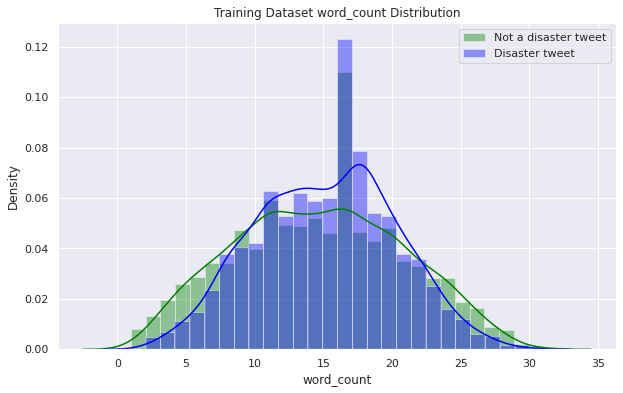

In [107]:
# word count distribution against target in train dataset 
distribution_plot(train_df, 'word_count')

#### **Unique Word Count**

In [108]:
# Creating unique word count feature in training and testing datasets 

def unique_word_count(df):
  df['unique_word_count'] = [len(set(sentence.lower().split())) for sentence in df['text']]
  return df


train_df = unique_word_count(train_df)
test_df = unique_word_count(test_df)

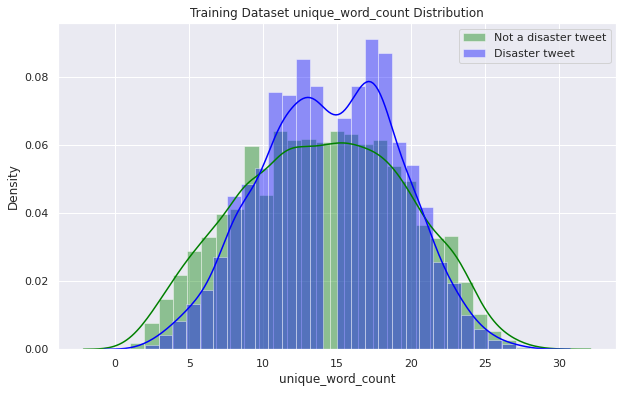

In [109]:
# unique word count distribution against target in train dataset 
distribution_plot(train_df, 'unique_word_count')

#### **Character Count**

In [110]:
# Creating a 'character count' feature 

def character_count(df):
  df['character_count'] = [len(str(sentence.lower())) for sentence in df['text']]
  return df 


train_df = character_count(train_df)
test_df = character_count(test_df)

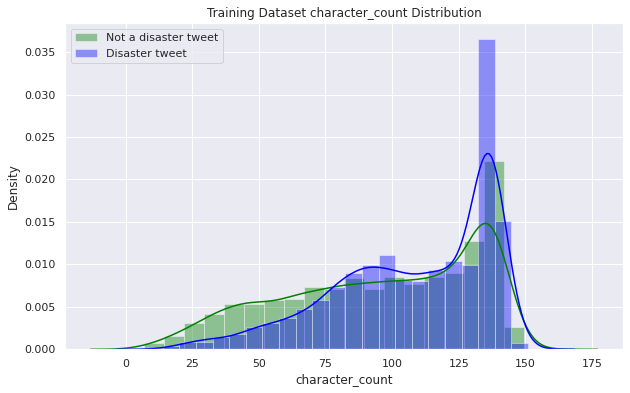

In [111]:
# distribution of character count against target in train dataset 

distribution_plot(train_df, 'character_count')

In [112]:
from nltk.corpus import stopwords

In [113]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### **Stopword Count**

In [114]:
from nltk.corpus import stopwords 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [115]:
# Creating 'stopword count' feature in the dataframe 

def stopword_count(df):
  df['stopword_count'] = df['text'].apply(lambda s: len([k for k in str(s).lower().split() if k in stopwords.words('english')]))
  return df 


train_df = stopword_count(train_df)
test_df = stopword_count(test_df)

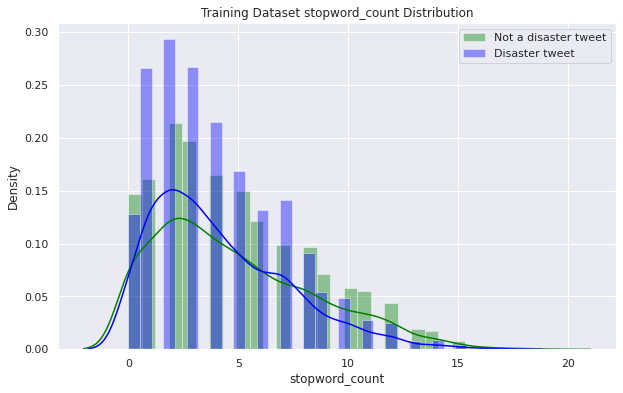

In [116]:
# Distribution of stopwords count against the target feature in train dataset 

distribution_plot(train_df, 'stopword_count')

#### **Punctuation Count**

In [117]:
# Creating 'punctuation count' feature in the dataframe 
import string 

def punctuation_count(df):
  df['punctuation_count'] = df['text'].apply(lambda s: len([k for k in str(s) if k in string.punctuation]))
  return df 


train_df = punctuation_count(train_df)
test_df = punctuation_count(test_df)

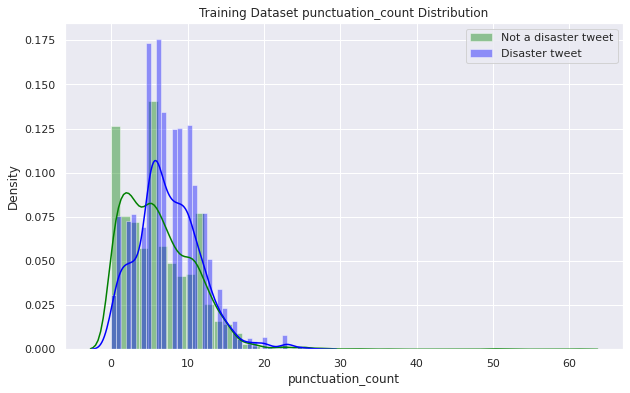

In [118]:
# Distribution of punctuation count against target feature in training dataset 

distribution_plot(train_df, 'punctuation_count')

#### **Mean Word Length** 


In [119]:
# Creating 'mean word length' feature in the dataframe 

def mean_word_length(df):
  df['mean_word_length'] = df['text'].apply(lambda s: np.mean([len(word) for word in str(s).split()]))
  return df
  

train_df = mean_word_length(train_df)
test_df = mean_word_length(test_df)

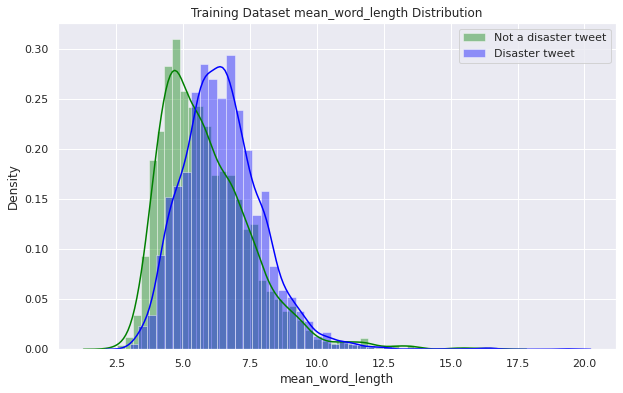

In [121]:
# Distribution of mean word length against the target feature in training dataset 

distribution_plot(train_df, 'mean_word_length')

#### **Mention Count**

In [122]:
# Creating mention count feature 

def mention_count(df):
  df['mention_count'] = df['text'].apply(lambda s: len([k for k in str(s) if k=='@']))
  return df 


train_df = mention_count(train_df)
test_df = mention_count(test_df)

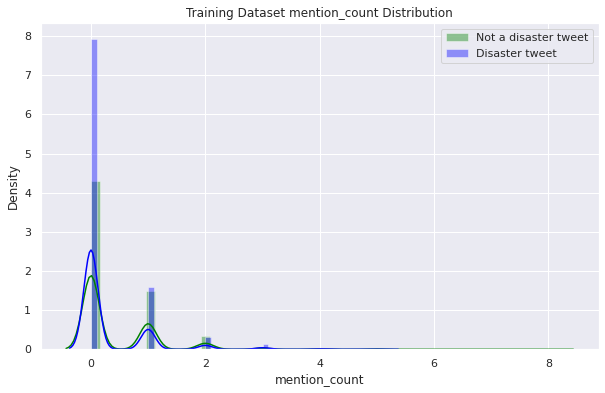

In [123]:
# Distribution of mention count against target variable in training data 

distribution_plot(train_df, 'mention_count')

#### **URL Count**

In [125]:
# Creating URL Count feature 

def url_count(df):
  df['url_count'] = df['text'].apply(lambda s: len([k for k in str(s).lower().split() if 'http' in k or 'https' in k]))
  return df 

train_df = url_count(train_df)
test_df = url_count(test_df)

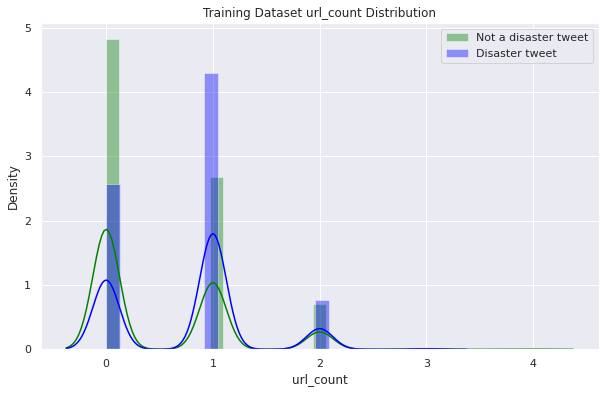

In [126]:
# Distribution of url count against target variable in training dataset 

distribution_plot(train_df, 'url_count')

#### **Hashtag Count**

In [127]:
# Creating hashtag count feature 

def hashtag_count(df):
  df['hashtag_count'] = df['text'].apply(lambda s: len([k for k in str(s) if k=='#']))
  return df 


train_df = hashtag_count(train_df)
test_df = hashtag_count(test_df)

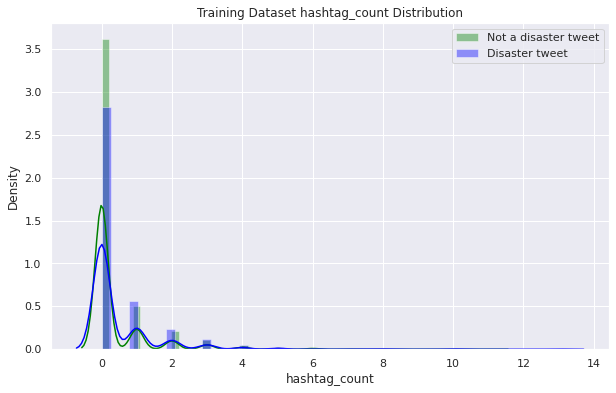

In [128]:
# Distribution of hashtag count against the target feature in training dataset 

distribution_plot(train_df, 'hashtag_count')